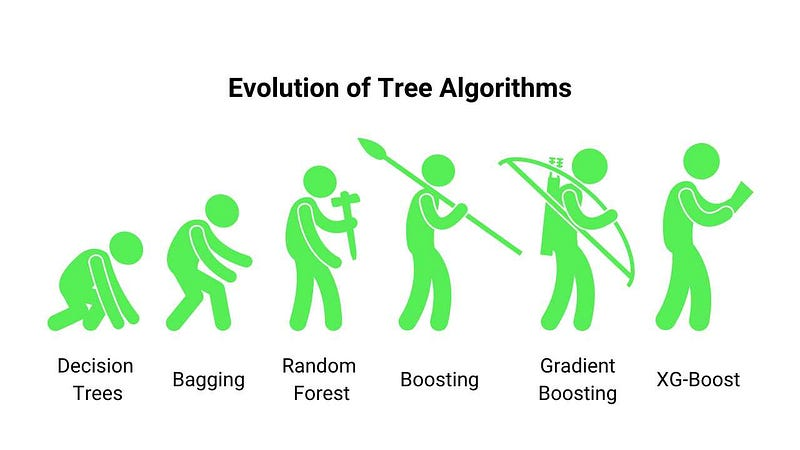


#3. Gradient Boosting

**What is Gradient Boosting?**

Gradient Boosting is an improvement over AdaBoost.

It builds models sequentially, but instead of focusing on misclassified points, it minimizes a loss function (e.g., Mean Squared Error for regression).

Think of it as gradually climbing down a hill (minimizing error) step by step.

**How It Works:**

Start with an initial weak model (e.g., predicting the mean in regression).

Calculate the error (residual) between the predictions and actual values.

Train the next model to predict the residuals (errors).

Add these models together to make the final prediction.

**Advantages:**

Can handle noisy datasets better than AdaBoost.

Works well for regression and classification problems.

**When to Use:**

When you have more complex problems where AdaBoost struggles.

For tasks where minimizing the loss function is crucial.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('HousePricePrediction.xlsx')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
df.dropna(inplace=True)  #(Completely Optional you can segregate data and then also build the model)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [ ]:
df.drop(columns=['Id'],inplace=True)

In [ ]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [ ]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,5.575342,1971.267808,1984.865753,46.549315,1057.429452,180921.195890
std,42.300571,9981.264932,1.112799,30.202904,20.645407,161.319273,438.705324,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,129975.000000
50%,50.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,991.500000,163000.000000
75%,70.000000,11601.500000,6.000000,2000.000000,2004.000000,0.000000,1298.250000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1474.000000,6110.000000,755000.000000


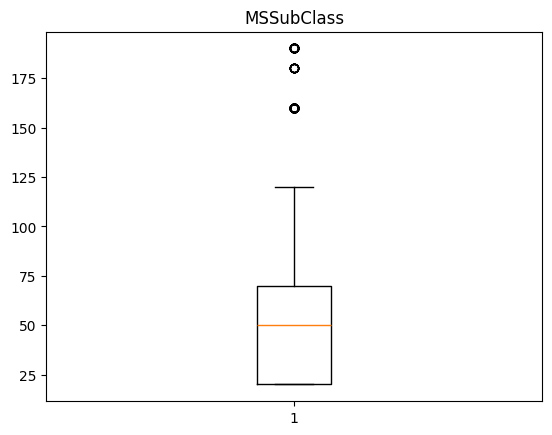

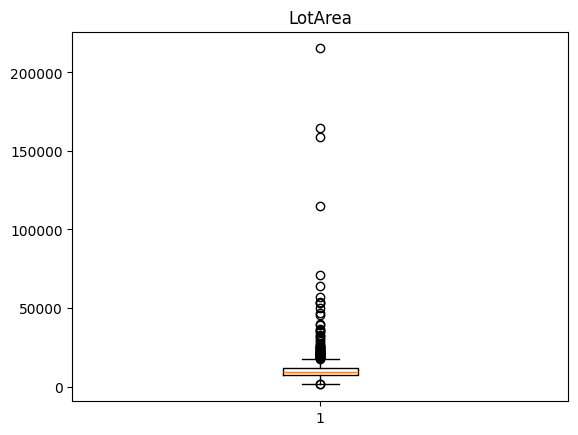

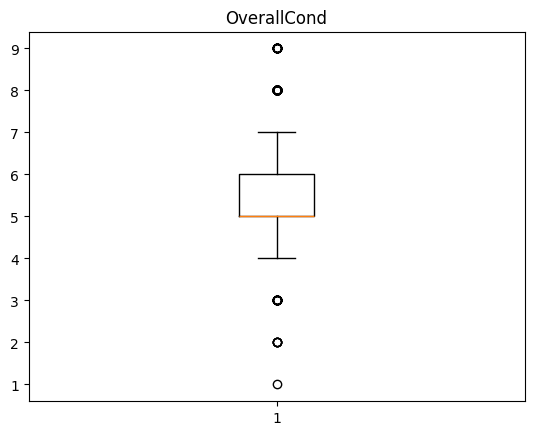

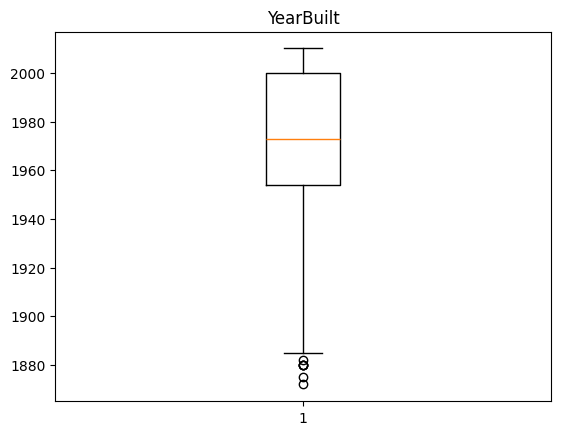

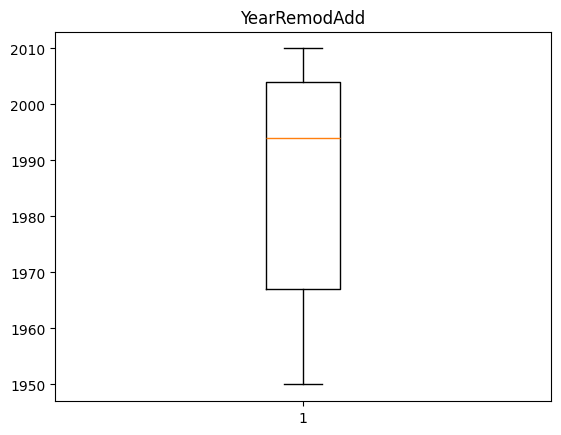

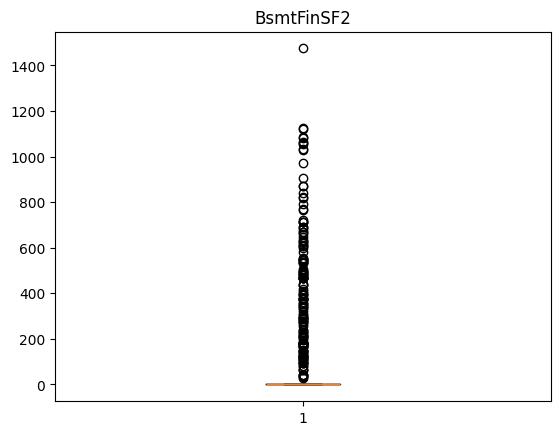

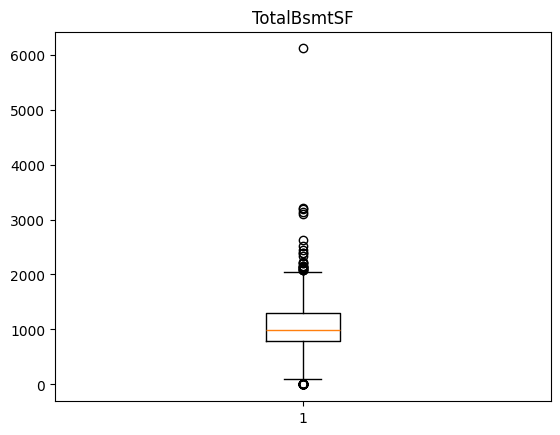

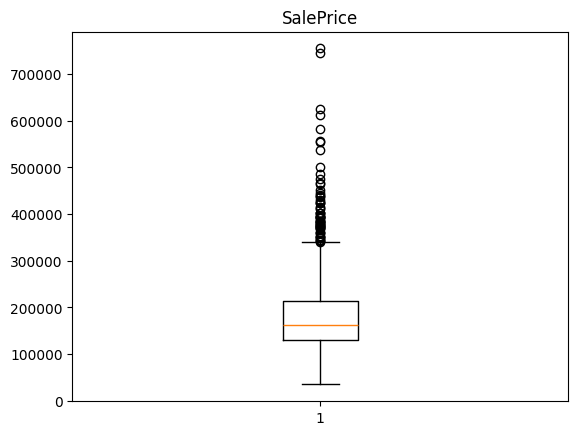

In [ ]:
for x in df.columns:
    if df[x].dtype!='object':
        plt.boxplot(df[x])
        plt.title(x)
        plt.show()

In [ ]:
out_col = ['TotalBsmtSF','YearBuilt','LotArea']
# Everyone remove outliers from thesre 3 columns.

In [ ]:
# for x in out_col:
#     Q1 = df[x].quantile(0.25)
#     Q3 = df[x].quantile(0.75)
#     IQR = Q3 - Q1
#     lb = Q1 - 1.5*IQR
#     ub = Q3 + 1.5*IQR
#     df = df[(df[x]>=lb) & (df[x]<=ub)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotArea       1460 non-null   int64  
 3   LotConfig     1460 non-null   object 
 4   BldgType      1460 non-null   object 
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Exterior1st   1460 non-null   object 
 9   BsmtFinSF2    1460 non-null   float64
 10  TotalBsmtSF   1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 148.3+ KB


In [ ]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df.columns:
    if df[x].dtype=='object':
        df[x] = le.fit_transform(df[x])

In [ ]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,4,0,5,1999,2000,12,0.0,953.0,175000.0
1456,20,3,13175,4,0,6,1978,1988,9,163.0,1542.0,210000.0
1457,70,3,9042,4,0,9,1941,2006,5,0.0,1152.0,266500.0
1458,20,3,9717,4,0,6,1950,1996,8,1029.0,1078.0,142125.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X = df.iloc[:,:-1]
y = df['SalePrice']

In [ ]:
X

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,4,0,5,1999,2000,12,0.0,953.0
1456,20,3,13175,4,0,6,1978,1988,9,163.0,1542.0
1457,70,3,9042,4,0,9,1941,2006,5,0.0,1152.0
1458,20,3,9717,4,0,6,1950,1996,8,1029.0,1078.0


In [ ]:
y

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(1168, 11)

In [ ]:
x_test.shape

(292, 11)

In [ ]:
y_train.shape

(1168,)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr_model.predict(x_test)
r2_score(lr_pred,y_test)

0.0970228445264022

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt_pred = dt_model.predict(x_test)

In [ ]:
r2_score(dt_pred,y_test)

0.7114833439576076

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=200)
gb_model.fit(x_train,y_train)


GradientBoostingRegressor(n_estimators=200)

In [ ]:
gb_pred = gb_model.predict(x_test)

In [ ]:
r2_score(gb_pred,y_test)

0.7806885959546634